In [4]:
import librosa
y,sr=librosa.load('./Spring.wav')
print(y)
print(sr)

[ 2.7137694e-06  3.3900375e-05 -4.3281481e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
22050


In [6]:
import librosa
y,sr=librosa.load('./Spring.wav',sr=None)
print(y)
print(sr)

[1.5258789e-05 0.0000000e+00 4.5776367e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
44100


In [7]:
#Log-Mel Spectrogram
import librosa 
y,sr=librosa.load('./Spring.wav',sr=None)
melspec=librosa.feature.melspectrogram(y,sr,n_fft=1024,hop_length=512,n_mels=128)
logmelspec=librosa.power_to_db(melspec)
logmelspec.shape

(128, 32040)

In [8]:
#MFCC
import librosa
y,sr=librosa.load('./Spring.wav',sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
mfccs.shape

(40, 32040)

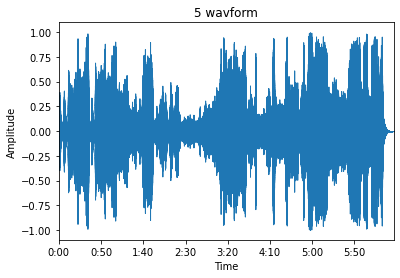

In [12]:
#waveplot()
import librosa
import librosa.display
#引入os模块，防止plt报错
import os
import matplotlib.pyplot as plt
# Load a wav file
y, sr = librosa.load('./5.wav', sr=None)
# plot a wavform
plt.figure()
librosa.display.waveplot(y, sr)
plt.title('5 wavform')
plt.ylabel('Amplitude')
plt.show()

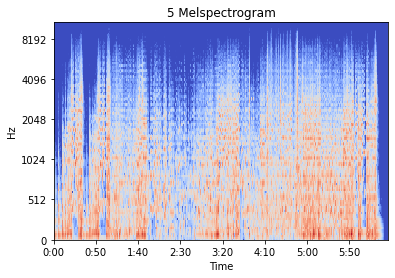

In [17]:
#梅尔频谱图
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt1
# Load a wav file
y, sr = librosa.load('./5.wav', sr=None)
# extract mel spectrogram feature
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
# convert to log scale
logmelspec = librosa.power_to_db(melspec)
# plot mel spectrogram
plt1.figure()
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt1.title('5 Melspectrogram')
plt1.show()

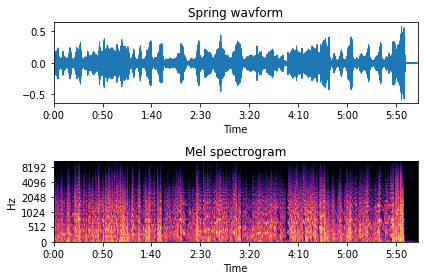

In [15]:
>>> import librosa
>>> import librosa.display
>>> # Load a wav file
>>> y, sr = librosa.load('./Spring.wav', sr=None)
>>> # extract mel spectrogram feature
>>> melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
>>> # convert to log scale
>>> logmelspec = librosa.power_to_db(melspec)
>>> plt.figure()
>>> # plot a wavform
>>> plt.subplot(2, 1, 1)
>>> librosa.display.waveplot(y, sr)
>>> plt.title('Spring wavform')
>>> # plot mel spectrogram
>>> plt.subplot(2, 1, 2)
>>> librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
>>> plt.title('Mel spectrogram')
>>> plt.tight_layout() #保证图不重叠
>>> plt.show()

AttributeError: module 'librosa.feature' has no attribute 'zero_crossings_rate'

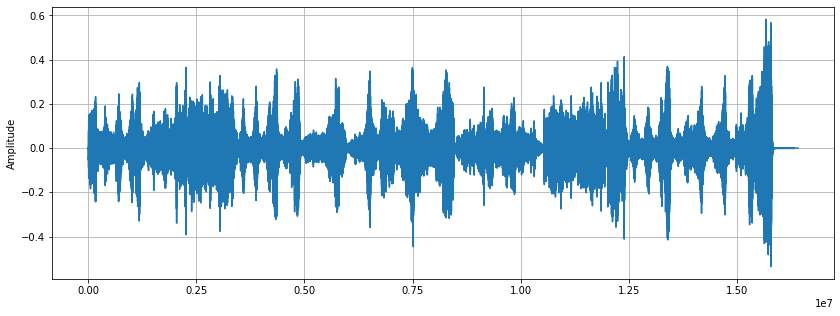

In [30]:
#zero-crossing rate
import librosa
import librosa.display
#引入os模块，防止plt报错
import os
import matplotlib.pyplot as plt
y, sr = librosa.load('./1.wav', sr=None)
#print(y)
plt.figure(figsize=(14,5))
#zooming in
n0=9000
n1=9100
plt.plot(y)
plt.grid()
plt.ylabel('Amplitude')
#zero_crossings = librosa.zero_crossings(y, pad=False)
zero_crossings = librosa.feature.zero_crossings_rate(y)
print(sum(zero_crossings))

Text(0, 0.5, 'Amplitude')

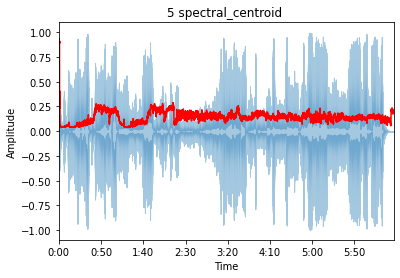

In [14]:
import librosa
import librosa.display
#引入os模块，防止plt报错
import os
import matplotlib.pyplot as plt
import sklearn
y, sr = librosa.load('./5.wav', sr=None)
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
#spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('5 spectral_centroid ')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

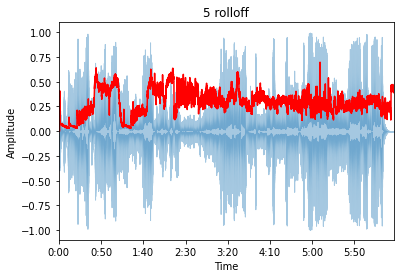

In [15]:
#Spectral rolloff
import librosa
import librosa.display
#import os
#import matplotlib.pyplot as plt
y, sr = librosa.load('./5.wav', sr=None)
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.title('5 rolloff')
plt.ylabel('Amplitude')

(20, 16020)


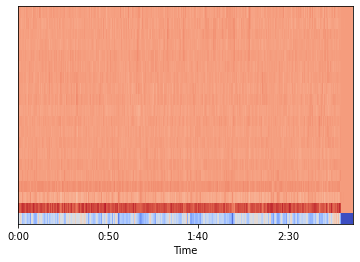

In [2]:
#MFCC
import librosa
import librosa.display
y, fs = librosa.load('./1.wav')
mfccs=librosa.feature.mfcc(y,sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis)

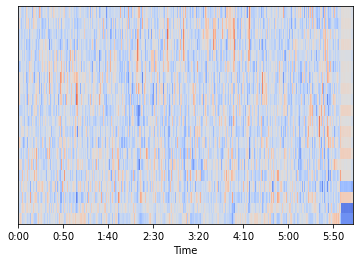

In [10]:
#MFCC mean var
import librosa
import librosa.display
import sklearn
import warnings
warnings.filterwarnings('ignore')
y, fs = librosa.load('./Spring.wav')
mfccs=librosa.feature.mfcc(y,sr=fs)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#print(mfccs.mean(axis=1))
#print(mfccs.var(axis=1))
librosa.display.specshow(mfccs,sr=sr,x_axis='time')

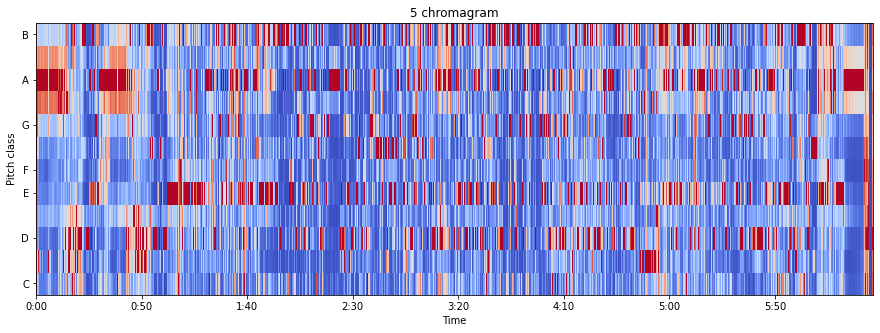

In [26]:
#chroma_stft
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
x, sr = librosa.load('./5.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
plt.title('5 chromagram')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=17478293, comptype='NONE', compname='not compressed')


d:\asoftware\ide\python\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


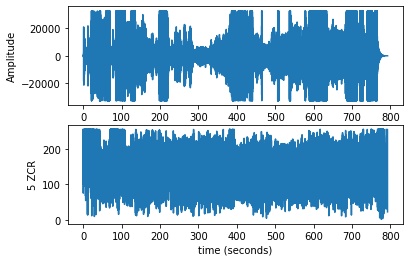

In [38]:
import math
import wave
import numpy as np
import pylab as pl
def ZeroCR(waveData,frameSize,overLap):
    wlen = len(waveData)
    step = frameSize - overLap
    frameNum = math.ceil(wlen/step)
    zcr = np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame = waveData[np.arange(i*step,min(i*step+frameSize,wlen))]
        #To avoid DC bias, usually we need to perform mean subtraction on each frame
        #ref: http://neural.cs.nthu.edu.tw/jang/books/audiosignalprocessing/basicFeatureZeroCrossingRate.asp
        curFrame = curFrame - np.mean(curFrame) # zero-justified
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr

# ============ test the algorithm =============
# read wave file and get parameters.
fw = wave.open('./5.wav','rb')
params = fw.getparams()
print(params)
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = fw.readframes(nframes)
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 1
#wave_data = wave_data.T
fw.close()

# calculate Zero Cross Rate
frameSize = 256
overLap = 0
zcr = ZeroCR(wave_data,frameSize,overLap)

# plot the wave
time = np.arange(0, len(wave_data)) * (1.0 / framerate)
time2 = np.arange(0, len(zcr)) * (len(wave_data)/len(zcr) / framerate)
pl.subplot(211)
pl.plot(time, wave_data)
pl.ylabel("Amplitude")
pl.subplot(212)
pl.plot(time2, zcr)
pl.ylabel("5 ZCR")
pl.xlabel("time (seconds)")
pl.show()

In [2]:
data=open("data.txt",'w+') 
print('这是个测试',file=data)
data.close()